# Задание

In [42]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#### Описание данных

В  ZIP-файле data.zip находится информация о студентах. Всего 10 групп студентов. Файлы в папке `Data` делятся на две категории:
* `Students_info_i` $-$ информация о студентах из группы i
* `Students_marks_i` $-$ оценки студентов из группы i за экзамены

**Одно из важных достоинств pandas $-$ это удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц: `merge`, `join`, `concat`. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных.**

Подробно об этих методах посмотрите [тут](https://www.kaggle.com/residentmario/renaming-and-combining#Combining).

#### Задание 1. Соберите всю информацию о студентах в одну таблицу `df`. В получившейся таблице должна быть информация и оценки всех студентов из всех групп. Напечатайте несколько строк таблицы для демонстрации результата.

In [37]:
df1 = pd.concat([pd.read_csv(glob.glob('*info*')[i]) for i in range(10)]).sort_values(by='index')
df2 = pd.concat([pd.read_csv(glob.glob('*marks*')[i]) for i in range(10)]).sort_values(by='index')
df = df1.merge(df2, on='index')
df

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,1,female,group C,some college,standard,completed,group1,69,90,88
2,2,female,group B,master's degree,standard,none,group1,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,4,male,group C,some college,standard,none,group1,76,78,75
...,...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,group10,88,99,95
996,996,male,group C,high school,free/reduced,none,group10,62,55,55
997,997,female,group C,high school,free/reduced,completed,group10,59,71,65
998,998,female,group D,some college,standard,completed,group10,68,78,77


#### Задание 2. Сделайте столбец *index* индексом у полученной таблицы. Напечатайте первые 10 строк таблицы.

In [38]:
df = df.set_index('index')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
index,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
5,female,group B,associate's degree,standard,none,group1,71,83,78
6,female,group B,some college,standard,completed,group1,88,95,92
7,male,group B,some college,free/reduced,none,group1,40,43,39
8,male,group D,high school,free/reduced,completed,group1,64,64,67


#### Задание 3. Выведите на экран размеры полученной таблицы

In [39]:
df.shape

(1000, 9)

#### Задание 4. Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [40]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Задание 5. Проверьте, есть ли в таблице пропущенные значения

In [51]:
np.where(pd.isnull(df))
# нет

(array([], dtype=int64), array([], dtype=int64))

#### Задание 6. Выведите на экран средние баллы студентов по каждому предмету (*math*, *reading*, *writing*)

In [56]:
print('math:', df['math score'].mean())
print('reading:', df['reading score'].mean())
print('writing:', df['writing score'].mean())

math: 66.089
reading: 69.169
writing: 68.054


#### Задание 7. Нарисуйте три гистограммы с результатами студентов по математике, чтению и письму. Отметьте на каждом графике линией стредние баллы студентов по каждому предмету.

В идеале сделайте это тремя графиками на одной фигуре.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

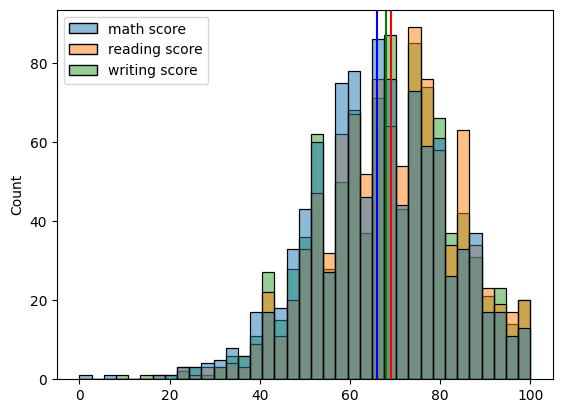

In [68]:
sns.histplot(data=df)
plt.axvline(x=df['math score'].mean(), color='blue')
plt.axvline(x=df['reading score'].mean(), color='red')
plt.axvline(x=df['writing score'].mean(), color='green')

#### Задание 8. Как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (*test preparation course*)?<br>Выведите на экран для каждого предмета в отдельности средний балл студентов, проходивших курс для подготовки к экзамену и не проходивших курс.

In [88]:
df_t = df.groupby(by='test preparation course')
print(df_t['math score'].mean())
print(df_t['reading score'].mean())
print(df_t['writing score'].mean())


test preparation course
completed    69.695531
none         64.077882
Name: math score, dtype: float64
test preparation course
completed    73.893855
none         66.534268
Name: reading score, dtype: float64
test preparation course
completed    74.418994
none         64.504673
Name: writing score, dtype: float64


#### Задание 9. Реализуйте три дисплота для каждого из предметов, где разными цветами будут отмечены люди, (не)проходившие курс для подготовки к сдаче экзамена.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

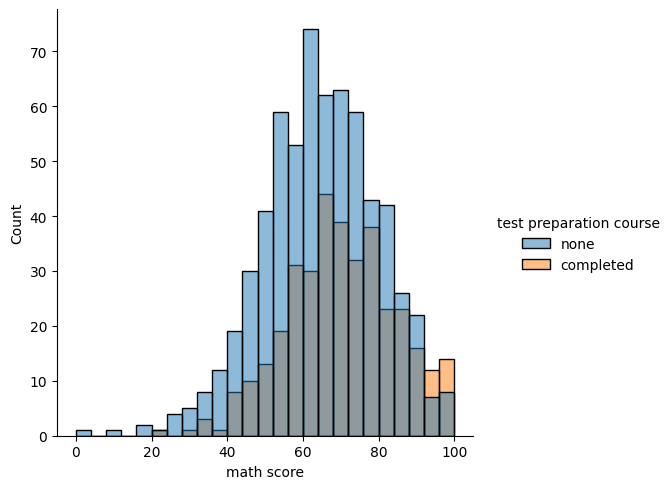

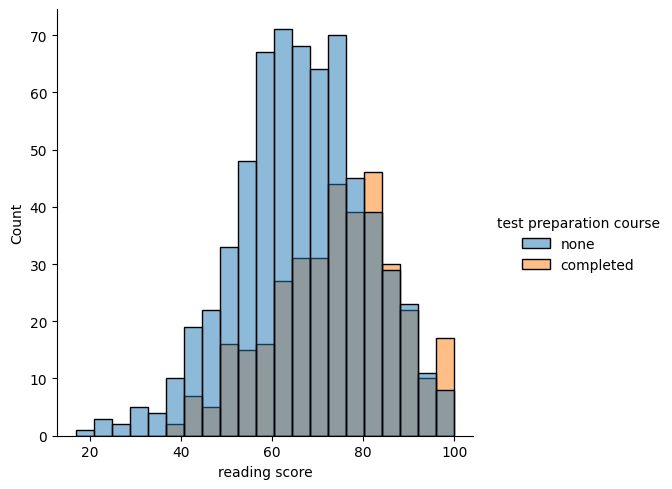

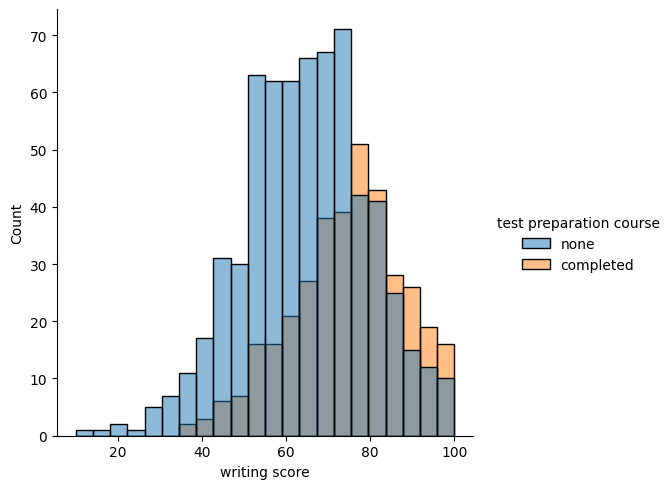

In [102]:
sns.displot(data=df, x='math score', hue='test preparation course')
sns.displot(data=df, x='reading score', hue='test preparation course')
sns.displot(data=df, x='writing score', hue='test preparation course')

#### Задание 10. Выведите на экран все различные значения из столбца *lunch*.

In [75]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

#### Задание 11. Постройте круговую диаграму, отображающую распределение студентов в зависимости от их типа обедов и отметьте проценты каждого типа.

([<matplotlib.patches.Wedge at 0x7d08baf320b0>,
 [Text(0.4839331201369527, 0.9878303170254058, ''),
  Text(-0.4839332126243002, -0.9878302717163125, '')],
 [Text(0.2639635200747015, 0.5388165365593122, '35.5%'),
  Text(-0.26396357052234554, -0.5388165118452614, '64.5%')])

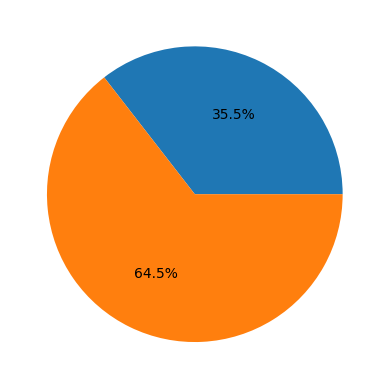

In [117]:
plt.pie(df.groupby(by='lunch').count()['gender'], autopct='%1.1f%%')

#### Задание 12. Переименуйте колонку *parental level of education* в *education*, а *test preparation course* в *test preparation*.

In [118]:
df = df.rename(columns={'parental level of education': 'education', 'test preparation course': 'test preparation'})

**Зафиксируем минимальный балл для сдачи экзамена**

In [119]:
passmark = 50

#### Задание 13. Ответьте на вопросы:
* Какая доля студентов сдала экзамен по математике (`passmark >= 50`)?
* Какая доля студентов, проходивших курс подготовки к экзамену, сдала экзамен по математике?
* Какая доля женщин, не проходивших курс подготовки к экзамену, не сдала экзамен по математике?

In [129]:
print('math passed:', df[df['math score'] >= passmark].shape[0] / df.shape[0])
print('math passed with preparation:', df[df['test preparation'] == 'completed'][df['math score'] >= passmark].shape[0] / df[df['test preparation'] == 'completed'].shape[0])
print('math not passed without preparation (female):', df[df.gender == 'female'][df['test preparation'] == 'none'][df['math score'] < passmark].shape[0] / df[df.gender == 'female'][df['test preparation'] == 'none'].shape[0])


math passed: 0.865
math passed with preparation: 0.9217877094972067
math not passed without preparation (female): 0.20958083832335328


<ipython-input-129-1974986ac900>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('math passed with preparation:', df[df['test preparation'] == 'completed'][df['math score'] >= passmark].shape[0] / df[df['test preparation'] == 'completed'].shape[0])
<ipython-input-129-1974986ac900>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('math not passed without preparation (female):', df[df.gender == 'female'][df['test preparation'] == 'none'][df['math score'] < passmark].shape[0] / df[df.gender == 'female'][df['test preparation'] == 'none'].shape[0])
<ipython-input-129-1974986ac900>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('math not passed without preparation (female):', df[df.gender == 'female'][df['test preparation'] == 'none'][df['math score'] < passmark].shape[0] / df[df.gender == 'female'][df['test preparation'] == 'none'].shape[0])
<ipython-input-129-1974986ac900>:3

#### Задание 14. С помощью `groupby` выполните задания ниже.
* Для каждой этнической группы выведите средний балл за экзамен по чтению
* Для каждого уровня образования выведите минимальный балл за экзамен по письму

In [132]:
ethnic_reading_mean = df.groupby(by='race/ethnicity')['reading score'].mean()
education_writing_min = df.groupby(by='education')['writing score'].min()
print(ethnic_reading_mean, education_writing_min)

race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64 education
associate's degree    35
bachelor's degree     38
high school           15
master's degree       46
some college          19
some high school      10
Name: writing score, dtype: int64


#### Задание 15. Постройте столбчатые диграммы:
* со средними баллами  за экзамен по чтению для каждой этнической группы
* с минимальными баллами за экзамен по письму для каждого уровня образования<br>(отдельным цветом выделите тех, кто закончил только школу)

<Axes: xlabel='race/ethnicity', ylabel='score'>

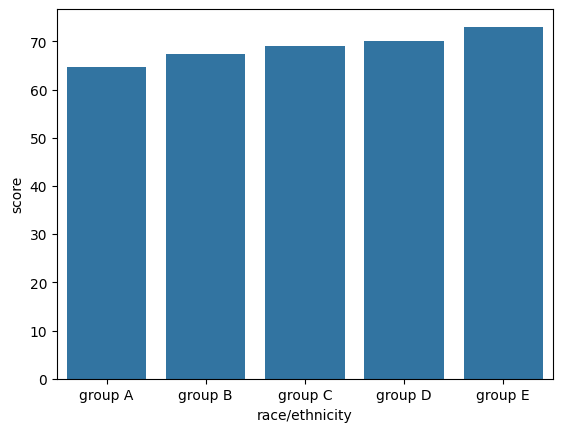

In [162]:
df_t1 = pd.DataFrame({'score': ethnic_reading_mean})
sns.barplot(data=df_t1, x='race/ethnicity', y='score')

<Axes: xlabel='education', ylabel='score'>

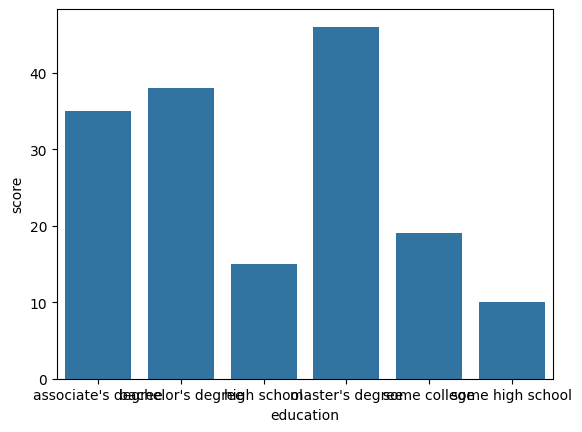

In [166]:
df_t2 = pd.DataFrame({'score': education_writing_min})
sns.barplot(data=df_t2, x='education', y='score')

#### Задание 16. Выведите на экран средние баллы студентов по каждому предмету в зависимости от пола и уровня образования. То есть должно получиться количество групп, равных 2 * (число уровней образования), и для каждой такой группы выведите средний балл по каждому из предметов.

In [170]:
grouped = df.groupby(by=['gender', 'education'])
print(grouped['math score'].mean())
print(grouped['reading score'].mean())
print(grouped['writing score'].mean())

gender  education         
female  associate's degree    65.250000
        bachelor's degree     68.349206
        high school           59.351064
        master's degree       66.500000
        some college          65.406780
        some high school      59.296703
male    associate's degree    70.764151
        bachelor's degree     70.581818
        high school           64.705882
        master's degree       74.826087
        some college          69.009259
        some high school      67.840909
Name: math score, dtype: float64
gender  education         
female  associate's degree    74.120690
        bachelor's degree     77.285714
        high school           68.202128
        master's degree       76.805556
        some college          73.550847
        some high school      69.109890
male    associate's degree    67.433962
        bachelor's degree     68.090909
        high school           61.480392
        master's degree       73.130435
        some college          64.

#### Задание 17. Реализуйте два хитмэпа: отдельно для женщин и мужчин, $-$ которые будут показывать средний балл по каждому из экзаменов в зависимости от образования.

<Axes: ylabel='education'>

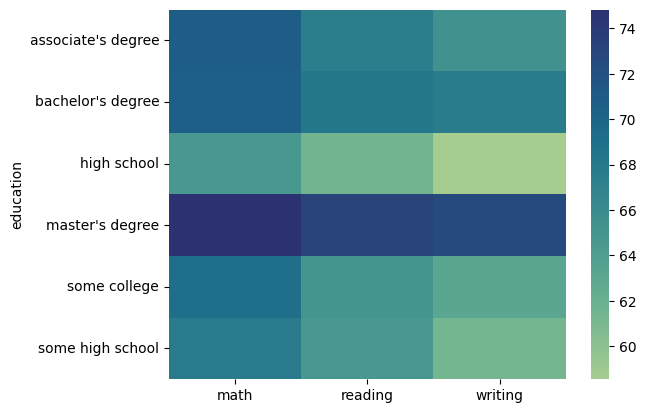

In [200]:
grouped = df[df['gender'] == 'male'].groupby(by='education')
df_t = pd.DataFrame({'math': grouped['math score'].mean(), 'reading': grouped['reading score'].mean(), 'writing': grouped['writing score'].mean()})
sns.heatmap(df_t, cmap="crest")

<Axes: ylabel='education'>

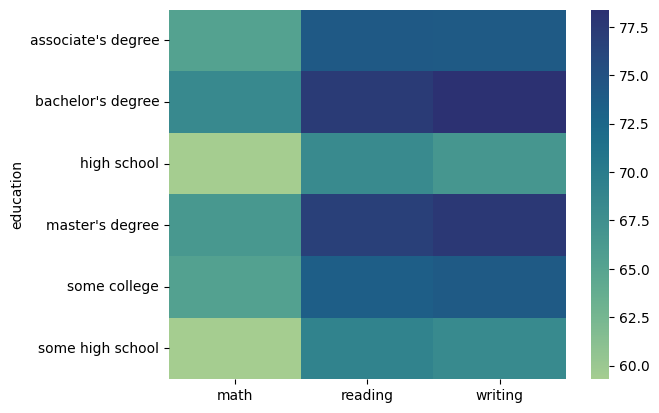

In [201]:
grouped = df[df['gender'] == 'female'].groupby(by='education')
df_t = pd.DataFrame({'math': grouped['math score'].mean(), 'reading': grouped['reading score'].mean(), 'writing': grouped['writing score'].mean()})
sns.heatmap(df_t, cmap="crest")

#### Задание 18. Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице `df` под названием *Math_PassStatus* и запишите в него *F*, если студент не сдал экзамен по математике (балл за экзамен `< passmark`), и *P* иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

Сделайте аналогичные шаги для экзаменов по чтению и письму.

In [225]:
temp = df['math score'] > passmark
temp = temp.replace(True, 'P').replace(False, 'F')
df['Math_PassStatus'] = temp
df

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math_PassStatus
index,,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P
1,female,group C,some college,standard,completed,group1,69,90,88,P
2,female,group B,master's degree,standard,none,group1,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F
4,male,group C,some college,standard,none,group1,76,78,75,P
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,group10,88,99,95,P
996,male,group C,high school,free/reduced,none,group10,62,55,55,P
997,female,group C,high school,free/reduced,completed,group10,59,71,65,P


#### Задание 19. Сколько студентов успешно сдали все экзамены?

Создайте столбец *OverAll_PassStatus* и запишите в него для каждого студента *F*, если студент не сдал хотя бы один из трех экзаменов, а иначе *P*.

Посчитайте количество студентов, которые сдали все экзамены.

In [226]:
temp = (df['math score'] >= passmark) & (df['reading score'] >= passmark) & (df['writing score'] >= passmark)
temp = temp.replace(True, 'P').replace(False, 'F')
df['OverAll_PassStatus'] = temp
df

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math_PassStatus,OverAll_PassStatus
index,,,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P,P
1,female,group C,some college,standard,completed,group1,69,90,88,P,P
2,female,group B,master's degree,standard,none,group1,90,95,93,P,P
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F,F
4,male,group C,some college,standard,none,group1,76,78,75,P,P
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,group10,88,99,95,P,P
996,male,group C,high school,free/reduced,none,group10,62,55,55,P,P
997,female,group C,high school,free/reduced,completed,group10,59,71,65,P,P


#### Задание 20. Переведем баллы в оценки

| Система перевода баллов в оценки |
|----------------------------------|
|     больше 90 = A                |
|       80-90 = B                  |
|       70-80 = C                  |
|       60-70 = D                  |
|       50-60 = E                  |
|     меньше 50 = F (Fail)         |

* Создайте вспомогательную функцию, которая будет по среднему баллу за три экзамена выставлять оценку студенту по данным выше критериям.
* Создайте столбец *Grade* и запишите в него оценку каждого студента.
* Выведите количество студентов, получивших каждую из оценок.

**В случае, если средний балл попадает на границу между оценками (т.е. равен ровно 60, 70 или 80 баллов), вы можете интерпретировать условие на своё усмотрение (т.е. можете поставить за 60 баллов оценку D, а можете - E).**

In [232]:
def get_grade(avg: float) -> str:
    if avg > 90:
        return 'A'
    elif avg >= 80:
        return 'B'
    elif avg >= 70:
        return 'C'
    elif avg >= 60:
        return 'D'
    elif avg >= 50:
        return 'E'
    return 'F'


df['Grade'] = ((df['math score'] + df['reading score'] + df['writing score']) / 3).apply(lambda x: get_grade(x))
df

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math_PassStatus,OverAll_PassStatus,Grade
index,,,,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P,P,C
1,female,group C,some college,standard,completed,group1,69,90,88,P,P,B
2,female,group B,master's degree,standard,none,group1,90,95,93,P,P,A
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F,F,F
4,male,group C,some college,standard,none,group1,76,78,75,P,P,C
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,group10,88,99,95,P,P,A
996,male,group C,high school,free/reduced,none,group10,62,55,55,P,P,E
997,female,group C,high school,free/reduced,completed,group10,59,71,65,P,P,D


#### Задание 21. Постройте столбчатую диграмму, где будет показано распределение студентов с каждой средней оценкой, а отдельным цветом будут выделены те, кто не сдал.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


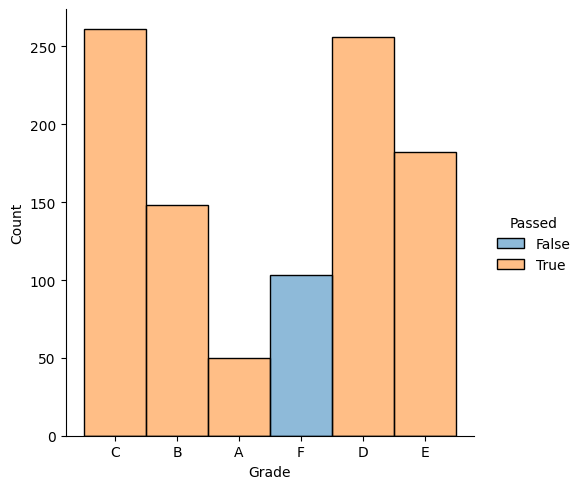

In [237]:
df['Passed'] = df.Grade != 'F'
sns.displot(data=df, x='Grade', hue='Passed')